<a href="https://colab.research.google.com/github/roshan10597/Coronavirus_Tweet_Sentiment_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets**

# **Problem Description**
## This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### **You are given the following information:**


*   Location = location (country) from where tweet is posted

*   Tweet At = Date on which tweet is posted
*   Original Tweet = Blog of tweet


*   Label = Type of sentiments ('Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive')









## **Data Science Problem Statement**

### Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic is Positive, Negative, or Neutral.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Important Libraries**

In [ ]:
# Import all necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pre_processing libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


# classification Ml models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import classification_report,confusion_matrix

## **Import Datasets**

In [ ]:
pos_txt=open('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/NLP/positive words.txt','r')
pos_words=pos_txt.read()

neg_txt=open('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/NLP/negative words.txt','r')
neg_words=neg_txt.read()

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/NLP/Coronavirus Tweets.csv',encoding= 'ISO-8859-1')

In [ ]:
df=data.copy()

# **Data Overview**

In [ ]:
# View first 5 records
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# View last 5 records
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
# Shape of the dataframe
df.shape

(41157, 6)

In [ ]:
# Getting all the features of dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# view some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# view indepth information about the dataset
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Check for NAN count
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Even though Location column have a NAN values we will not treat them because for the final prediciton we will required only OriginalTweet column and not required any other columns.

In [ ]:
df['Location'].value_counts().head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

This tweet data is recorded within the last 30 days and the number of the tweets is 41157, and the features are 6, from which 'Sentiment' is our target variable, i.e. dependent variable, and the others are independent variables, but as feature 'Location' has 8590 records missing, we will not include it. Basically, we need only the 'OriginalTweet' fatures to classify the sentiment.

# **Exploratory Data Analysis (EDA)** 


### **Percentage wise sentiments**

In [ ]:
Sentiments=df['Sentiment'].value_counts()
Sentiments

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

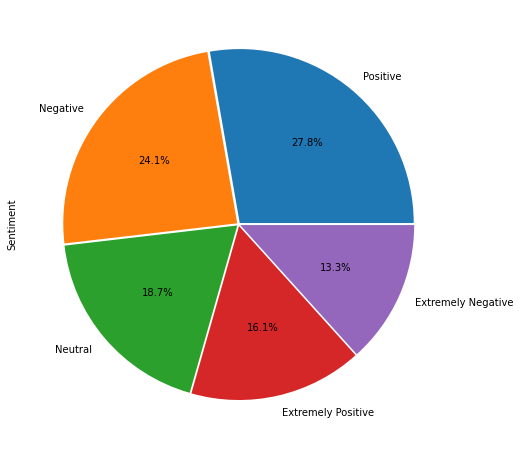

In [ ]:
Sentiments.plot.pie(figsize=(16,8),explode=[0.01,0.01,0.01,0.01,0.01],autopct='%1.1f%%')

From the Pie chart we can see that 44% people are tweeting positive and 37% are tweeting negative will rest of the people who are tweeting have a neutral opinion.

### **Top 10 highest number of tweet days**

In [ ]:
#top 10 days on which tweets are highest
dates=df['TweetAt'].value_counts().head(10)
dates

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
Name: TweetAt, dtype: int64

Text(0, 0.5, 'No. of Tweets')

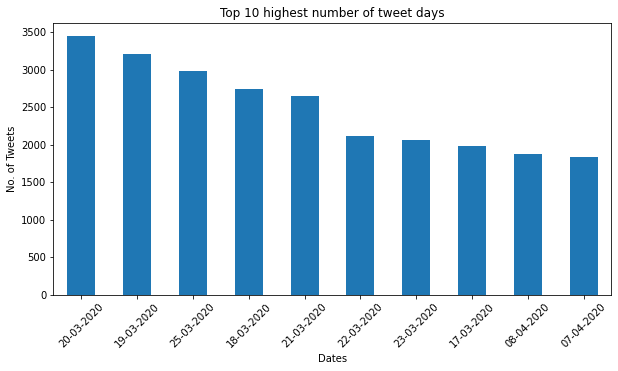

In [ ]:
dates.plot(kind='bar',figsize=(10,5))
plt.title("Top 10 highest number of tweet days")
plt.xlabel('Dates')
plt.xticks(rotation=45)
plt.ylabel('No. of Tweets')

### **Top 10 most tweets locations**

In [ ]:
top_locations=df['Location'].value_counts().head(10)
top_locations


London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

Text(0, 0.5, 'No. of Tweets')

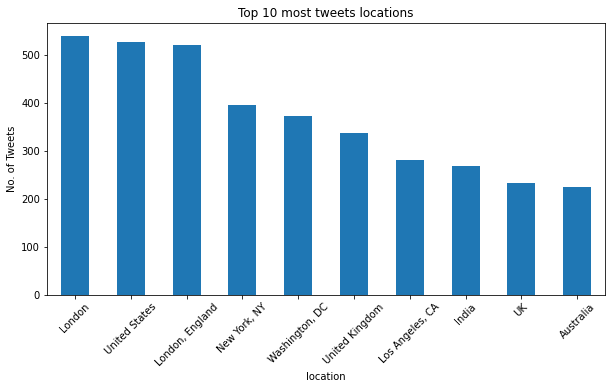

In [ ]:
top_locations.plot(kind='bar',figsize=(10,5))
plt.title("Top 10 most tweets locations")
plt.xlabel('location')
plt.xticks(rotation=45)
plt.ylabel('No. of Tweets')

### **Create New DF**

In [ ]:
df_tweet=pd.DataFrame()

In [ ]:
df_tweet['tweet']=df['OriginalTweet']

In [ ]:
df_tweet

,tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV..."
...,...
41152,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...
41154,You know itÂs getting tough when @KameronWild...
41155,Is it wrong that the smell of hand sanitizer i...


# **Text Pre-processing**

Text preprocessing is an approach for cleaning and preparing text data for use in a specific context.

### **Lower Casing**

In [ ]:
# Define Fuction to Lower Case
def lower_case(text):
    return text.lower()

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(lower_case)

### **Remove HTML tags (<*html*>)**

In [ ]:
# Define Fuction to remove HTML tags
def remove_html(text):
    pattern=re.compile('<[^>]*>')
    return pattern.sub(r'',text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_html)

### **Remove usernames (@abc)**

In [ ]:
# Define Fuction to remove Usernames
def remove_usernames(text):
   return " ".join(filter(lambda x:x[0]!='@', text.split()))

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_usernames)

### **Remove URL address (https://)**

In [ ]:
# Define Fuction to remove URLs
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_url)

### **Remove Punctuations**

In [ ]:
exclude=string.punctuation

# Define Fuction to remove Punctuations
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_punc)

### **Remove Emojis**

In [ ]:
#Define Fuction to Removes Emojis
def remove_emoji(text):
    """
    helper function to remove emojis from a document
    
    Arguments:
    text -- takes one text review at a time
    
    Returns:
    String -- python string with removed emojis from the emoji_clean
    """
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_clean.sub(r'',text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_emoji)

### **Remove the Stopwords**

In [ ]:
# get the stop words
nltk.download('stopwords')
sw = stopwords.words('english')

#Define Function to remove stopwords
def remove_stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_stopwords)

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready go supermarket covid19 outbreak im paran...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid19 rel...
41154    know itâs getting tough rationing toilet pape...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going 70000 amazon rn althou...
Name: tweet, Length: 41157, dtype: object

## **Remove Numeric data**

In [ ]:
# Remove Numeric data from tweets
df_tweet['tweet']=df_tweet['tweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready go supermarket covid   outbreak im paran...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid   rel...
41154    know it  s getting tough rationing toilet pape...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going       amazon rn althou...
Name: tweet, Length: 41157, dtype: object

### **Remove the shorts words**

In [ ]:
#Removing words with less than 3 letters
def remove_shortwords(text):
  long_words=[]
  for w in text.split():
    if len(w)>=3:
      long_words.append(w)
    else:
      pass
  pass_list=long_words.copy()
  long_words.clear()
  return " ".join(pass_list)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_shortwords)

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready supermarket covid outbreak paranoid food...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper coro...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going amazon although normal...
Name: tweet, Length: 41157, dtype: object

### **Remove extra spaces**

In [ ]:
# Define Fuction to remove extra spaces
def remove_spaces(text):
  return re.sub(' +', ' ', text)

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(remove_spaces)

In [ ]:
df_tweet['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please dont panic enough ...
4        ready supermarket covid outbreak paranoid food...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper coro...
41155    wrong smell hand sanitizer starting turn coron...
41156    well newused rift going amazon although normal...
Name: tweet, Length: 41157, dtype: object

### **Find Positve and Negative words in tweets**

In [ ]:
pos_word_lists=pos_words.split("\n")
neg_word_lists=neg_words.split("\n")

In [ ]:
pos_word_lists[:20]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately']

In [ ]:
# Define Fuction to to find Positive and negative words in each tweet.
def posneg_counter(text):
  positive=0
  negative=0
  for w in text.split():
    if w in pos_word_lists:
      positive+=1
    elif w in neg_word_lists:
      negative+=1
    else:
      pass
  return positive , negative

In [ ]:
df_tweet['pos_neg_word_counts']=df_tweet['tweet'].apply(posneg_counter)

In [ ]:
df_tweet.head()

,tweet,pos_neg_word_counts
0,,"(0, 0)"
1,advice talk neighbours family exchange phone n...,"(1, 0)"
2,coronavirus australia woolworths give elderly ...,"(1, 2)"
3,food stock one empty please dont panic enough ...,"(3, 1)"
4,ready supermarket covid outbreak paranoid food...,"(1, 4)"


In [ ]:
df_tweet[['positive_words', 'negative_words']] = pd.DataFrame(df_tweet['pos_neg_word_counts'].tolist(), index=df.index)
df_tweet['ratio_pos_neg'] = df_tweet['positive_words']/ (df_tweet['negative_words'] + 0.01) # implicitly adding one to the denominator to avoid divide by zero error
df_tweet.drop(['pos_neg_word_counts'], axis=1, inplace=True)
df_tweet.head()

,tweet,positive_words,negative_words,ratio_pos_neg
0,,0,0,0.000000
1,advice talk neighbours family exchange phone n...,1,0,100.000000
2,coronavirus australia woolworths give elderly ...,1,2,0.497512
3,food stock one empty please dont panic enough ...,3,1,2.970297
4,ready supermarket covid outbreak paranoid food...,1,4,0.249377


In [ ]:
# Define Fuction to Encode the sentiments.
def encode_sentiments(text):
  if text=='Neutral':
    return 0
  elif (text=='Positive') or  (text=='Extremely Positive'):
    return 1
  else:
    return -1

In [ ]:
df_tweet['Sentiment']=df['Sentiment'].apply(encode_sentiments)

Text(0.5, 1.0, 'No. of Sentiments after encoding')

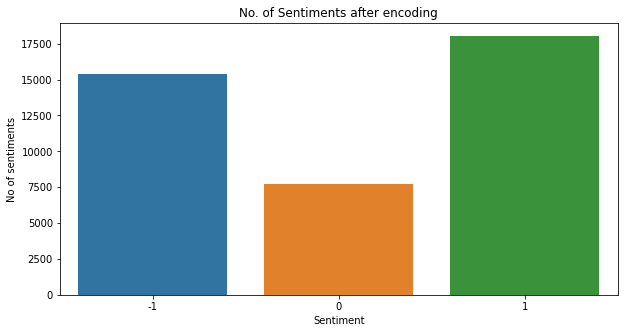

In [ ]:
# plot the results
plt.figure(figsize=(10,5))
sns.countplot(df_tweet['Sentiment'])
plt.ylabel('No of sentiments')
plt.title("No. of Sentiments after encoding")

## **Visualize the word of sentiments**

In [ ]:
#Import the library
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

### **Word Cloud for Negative Sentiments word**

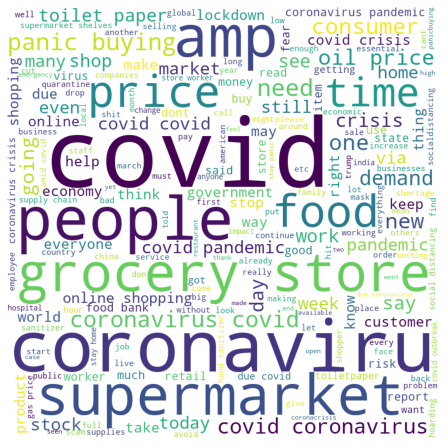

In [ ]:
#word cloud for negative sentiment
words=' '.join(text for text in df_tweet.tweet[df_tweet['Sentiment'] == -1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Word Cloud for Positive Sentiments word**

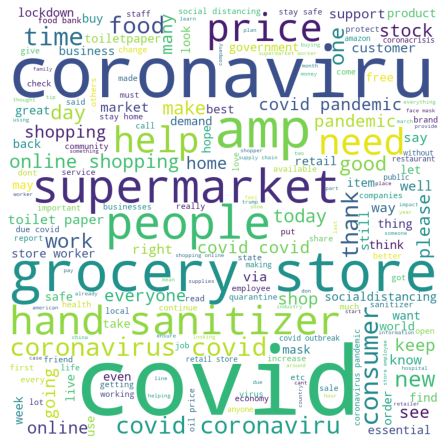

In [ ]:
#word cloud for positive sentiment
words=' '.join(text for text in df_tweet.tweet[df_tweet['Sentiment'] == 1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Word Cloud for Neutral Sentiments word**

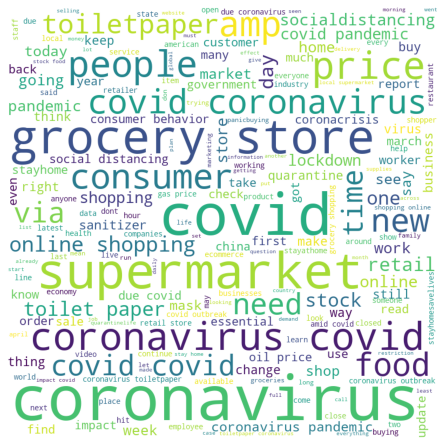

In [ ]:
#word cloud for neutral sentiment
words=' '.join(text for text in df_tweet.tweet[df_tweet['Sentiment'] == 0])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Stemming**
Stemming is a technique used to extract the base form of the words by removing suffixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

In [ ]:
# Import the stemmer and Stemming
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
df_tweet['tweet']=df_tweet['tweet'].apply(stem_words)

In [ ]:
df_tweet.head()

,tweet,positive_words,negative_words,ratio_pos_neg,Sentiment
0,,0,0,0.000000,0
1,advic talk neighbour famili exchang phone numb...,1,0,100.000000,1
2,coronaviru australia woolworth give elderli di...,1,2,0.497512,1
3,food stock one empti pleas dont panic enough f...,3,1,2.970297,1
4,readi supermarket covid outbreak paranoid food...,1,4,0.249377,-1


In [ ]:
df_tweet.drop(0,axis=0,inplace=True)

## **Train Test Split**

In [ ]:
X=df_tweet.drop('Sentiment',axis=1)
Y=df_tweet['Sentiment']

In [ ]:
X.shape , Y.shape

((41156, 4), (41156,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((32924, 4), (8232, 4), (32924,), (8232,))

In [ ]:
X_train

,tweet,positive_words,negative_words,ratio_pos_neg
39809,higher crude oil price covid lockdown extens a...,1,2,0.497512
34383,good read onlineshop malwar identitythief impo...,3,0,300.000000
26022,enlink said wednesday laid employe workforc cu...,0,2,0.000000
30037,covid wrench havoc must laser focus abil produ...,0,1,0.000000
20667,digit sale grew third quarter,0,0,0.000000
...,...,...,...,...
4971,peopl dont realiz cashier major groceri store ...,2,1,1.980198
26498,puls oximet price went amazon still ebay reaso...,2,1,1.980198
1543,new zealand govern today announc billion econo...,3,0,300.000000
24195,well isnt great rang last week said stay high ...,4,1,3.960396


# **Vectorization (TFIDF)**

In [ ]:
tfidf = TfidfVectorizer(analyzer='word',stop_words= 'english')
X_train_tfidf = tfidf.fit_transform(X_train['tweet'])
X_test_tfidf = tfidf.transform(X_test['tweet'])

In [ ]:
# #visual of TFIDF vectorization dataframe
# vect_df=pd.DataFrame(
#      X_train_tfidf.todense(),
#      columns = tfidf.get_feature_names()
# )
# vect_df

In [ ]:
train_add_features = X_train[['positive_words','negative_words','ratio_pos_neg']].to_numpy()
test_add_features = X_test[['positive_words','negative_words','ratio_pos_neg']].to_numpy()

In [ ]:
print(train_add_features.shape)
print(test_add_features.shape)

(32924, 3)
(8232, 3)


In [ ]:
# from sklearn.decomposition import PCA
# pca_tf=PCA(n_components=300, random_state=42)
# pca_tf.fit(X_train_tfidf)
# Xtf_train_pca = pca_tf.fit_transform(X_train_tfidf)
# print(Xtf_train_pca.shape)

# Xtf_test_pca=pca_tf.transform(X_test_tfidf)
# print(Xtf_test_pca.shape)

Since PCA is not working for Sparse input , we have to use TruncatedSVD.

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_tf = TruncatedSVD(n_components=1000, n_iter=7, random_state=42)
svd_tf.fit(X_train_tfidf)
Xtf_train_truncated = svd_tf.fit_transform(X_train_tfidf)
print(Xtf_train_truncated.shape)

Xtf_test_truncated=svd_tf.transform(X_test_tfidf)
print(Xtf_test_truncated.shape)


(32924, 1000)
(8232, 1000)


In [ ]:
X_train_add=X_train.drop('tweet',axis=1)
X_test_add=X_test.drop('tweet',axis=1)

In [ ]:
print(type(train_add_features))
print(type(Xtf_train_truncated))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train_tf = np.c_[Xtf_train_truncated,train_add_features]
X_test_tf = np.c_[Xtf_test_truncated ,test_add_features]

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_tf_scaled=scaler.fit_transform(X_train_tf)
X_test_tf_scaled=scaler.transform(X_test_tf)

In [ ]:
print(X_train_tf.shape)
print(X_test_tf.shape)

(32924, 1003)
(8232, 1003)



# **Machine Learning Models (Classification)**

### **The prediction model should be chosen in such a way that it:**


*   Is able to predict the dependent variable with high accuracy (Accuracy).
*   Is easy to interpret (Interpretability)

*   Is easy to explain the model (Explainability).


### **Modeling approach:**






*   Use a logistic regressor model to come up with initial set of classification (baseline model)

*   Calculate the model accuracy using the classification evaluation metrics.
*   Then add another hyperparameter and improve the model accuracy by hyperparameter tuning.



*   Choose the model with the highest accuracy for deployment and also have interpretabilty and explainability.



### **Evaluation metrics:**
In classification model evaluation matrics like accuracy, precision, recall, f1_ score are mostly use to find out the accuracy and error in classification, so that we will used that matrics to evaluate our model.

In [ ]:
#empty data frame creation
i=1
evaluation_df=pd.DataFrame()

# **1. Logistic Regression**
Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables.

Now, we will fit the above processed data on various classification models.

In [ ]:
#Model define
lr= LogisticRegression()

In [ ]:
#hyperparameter tunning

# parameters
param = dict(penalty=['l2'],
            C=[100, 10, 1.0,0.1])

#fit above parameter in gridsearch
grid_search = GridSearchCV(estimator=lr, param_grid=param,  cv=KFold(n_splits=3), scoring='accuracy')

# fit the data to traine the model
lr_tunned = grid_search.fit(X_train_tf_scaled, y_train)

In [ ]:
# best parameters
lr_tunned.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
#prediction
y_pred_lr = lr_tunned.predict(X_test_tf_scaled)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_lr))

Classification result 
               precision    recall  f1-score   support

          -1       0.80      0.81      0.80      3080
           0       0.72      0.69      0.71      1542
           1       0.82      0.83      0.83      3610

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



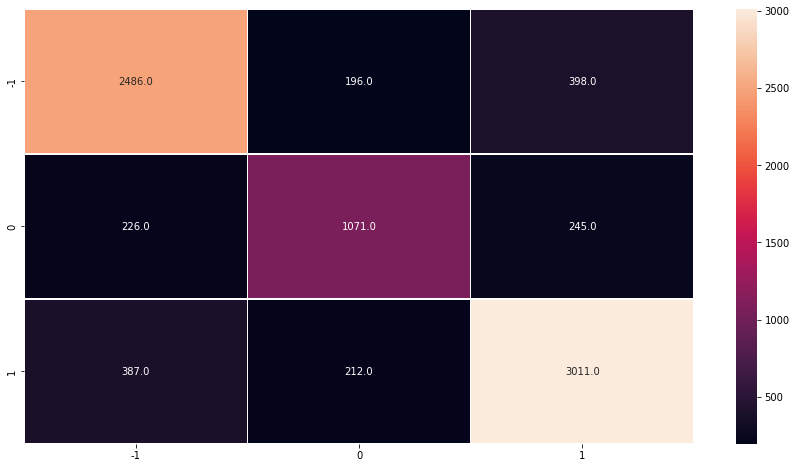

In [ ]:
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_lr)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_lr,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_lr)

#calculate the precision
precision = precision_score(y_test,y_pred_lr, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_lr, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7978620019436345
Precision : 0.797147928384467
Recall : 0.7978620019436345
F1 score : 0.7974309939583717


In [ ]:
#Inserting errors in dataframe

evaluation_df.loc[i,"Model_Name"]='Logistic Regression'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)


i+=1

# **2. Ridge Classifier**
Ridge regression is a penalized linear regression model for predicting a numerical value.

Nevertheless, it can be very effective when applied to classification.

In [ ]:
# define models 
Rc = RidgeClassifier()

In [ ]:
#Hyperparameter Tunning

# define parameters
param =  {'alpha': [1e-5,1e-4,1e-3,1e-2,1,2,3]}

# define grid search
grid_search = GridSearchCV(estimator=Rc, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

#fit the data to train model
Rc_tunned = grid_search.fit(X_train_tf_scaled, y_train)

In [ ]:
# best parameters
Rc_tunned.best_params_

{'alpha': 2}

In [ ]:
#prediction
y_pred_rc = Rc_tunned.predict(X_test_tf_scaled)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_rc))

Classification result 
               precision    recall  f1-score   support

          -1       0.79      0.81      0.80      3080
           0       0.75      0.59      0.66      1542
           1       0.80      0.85      0.82      3610

    accuracy                           0.79      8232
   macro avg       0.78      0.75      0.76      8232
weighted avg       0.78      0.79      0.78      8232



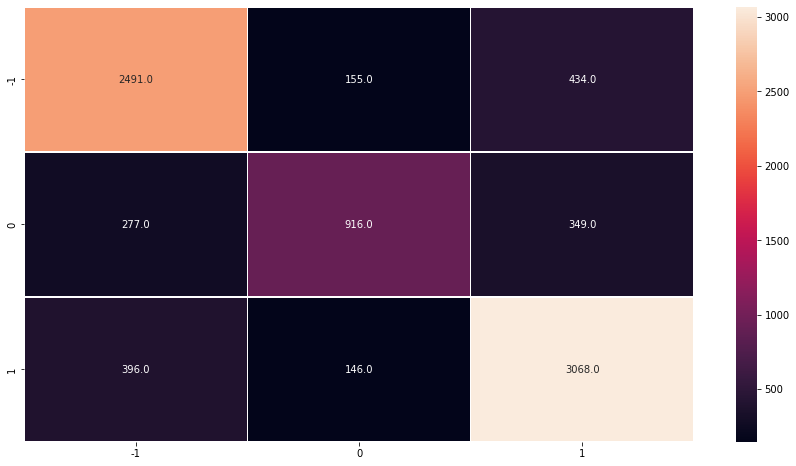

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_rc)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_rc,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_rc)

#calculate the precision
precision = precision_score(y_test,y_pred_rc, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_rc, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7865646258503401
Precision : 0.784923008774173
Recall : 0.7865646258503401
F1 score : 0.783562902588127


In [ ]:
#Inserting errors in dataframe

evaluation_df.loc[i,"Model_Name"]='Ridge Regression'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)


i+=1

# **3. K-Nearest Neighbors (KNN)**
k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification

In [ ]:
#Define model
knn = KNeighborsClassifier()

In [ ]:
# Hyperparameter Tunning

# parameter
param = dict(n_neighbors=range(1,3))

# tunning
grid_search = GridSearchCV(estimator=knn, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')

# fit the training data to train the model
knn_tunned = grid_search.fit(X_train_tf_scaled,y_train)

In [ ]:
# best parameters
knn_tunned.best_params_

{'n_neighbors': 1}

In [ ]:
#prediction
y_pred_knn = knn_tunned.predict(X_test_tf_scaled)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_knn))

Classification result 
               precision    recall  f1-score   support

          -1       0.60      0.43      0.50      3080
           0       0.26      0.61      0.37      1542
           1       0.63      0.43      0.51      3610

    accuracy                           0.46      8232
   macro avg       0.50      0.49      0.46      8232
weighted avg       0.55      0.46      0.48      8232



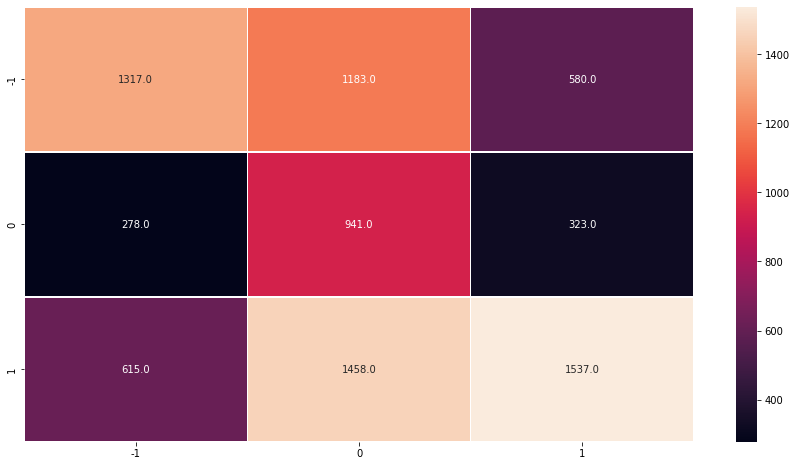

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_knn)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_knn,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_knn)

#calculate the precision
precision = precision_score(y_test,y_pred_knn, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_knn, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.4610058309037901
Precision : 0.5484145060875693
Recall : 0.4610058309037901
F1 score : 0.4779150239704813


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='K-Nearest Neighbors (KNN)'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **4.Extreme Gradiant Boosting (XGBoost)**

In [ ]:
# define model
xgb = XGBClassifier()

In [ ]:
#hyperparameter tuning
'''
#parameters
param=dict(max_depth=[ 3, 18, 1],
           n_estimators = [10,50,100]
           )

grid_search= GridSearchCV(estimator=xgb, param_grid=param, cv=KFold(n_splits=3), scoring='accuracy')
'''
#With hyperparameter tunning this cell taking a more than 2 hour to run it so I skip this hyperparamter tunning process and went forward with default features.

#fit the train data to train the model
xgb_tunned=xgb.fit(X_train_tf,y_train)

In [ ]:
#prediction
y_pred_xgb = xgb.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_xgb))

Classification result 
               precision    recall  f1-score   support

          -1       0.72      0.75      0.73      3080
           0       0.63      0.56      0.59      1542
           1       0.75      0.76      0.75      3610

    accuracy                           0.72      8232
   macro avg       0.70      0.69      0.69      8232
weighted avg       0.72      0.72      0.72      8232



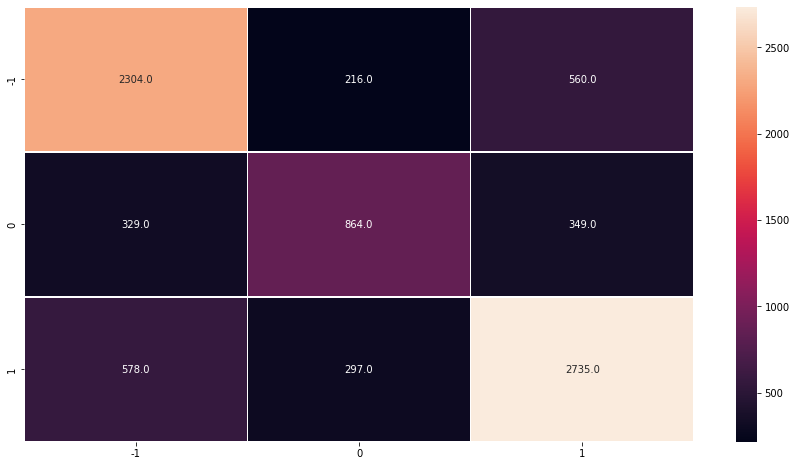

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_xgb)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_xgb,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_xgb)

#calculate the precision
precision = precision_score(y_test,y_pred_xgb, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_xgb, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7170796890184645
Precision : 0.7151377387326316
Recall : 0.7170796890184645
F1 score : 0.7156271135742106


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='XGBoost Classifier'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **5. Gradient Boosting Machine (GBM)**
The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model. But how do we do that? How do we reduce the error? This is done by building a new model on the errors or residuals of the previous model.



In [ ]:
#define model
gbm = GradientBoostingClassifier()

'''
#hyperparameter tuning
# define grid search
param = dict(n_estimators = [10, 100, 1000],
             learning_rate = [0.001, 0.01, 0.1],
             subsample = [0.5, 0.7, 1.0],
             max_depth = [3, 7, 9] )

#tuning
GBC = GridSearchCV(estimator=GBC, param_grid=param)
'''
#With hyperparameter tunning this cell taking a more than 1.5 hour to run it so I skip this hyperparamter tunning process and went forward with default features.

#fit the train data to train the model
gbm_tunned = gbm.fit(X_train_tf,y_train)

In [ ]:
#prediction
y_pred_gbm = gbm_tunned.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_gbm))

Classification result 
               precision    recall  f1-score   support

          -1       0.73      0.76      0.74      3080
           0       0.63      0.57      0.60      1542
           1       0.76      0.76      0.76      3610

    accuracy                           0.72      8232
   macro avg       0.71      0.70      0.70      8232
weighted avg       0.72      0.72      0.72      8232



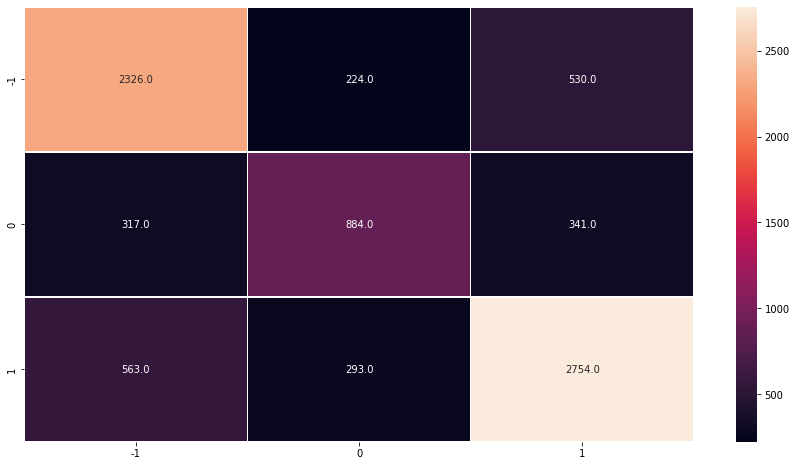

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_gbm)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_gbm,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_gbm)

#calculate the precision
precision = precision_score(y_test,y_pred_gbm, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_gbm, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7244897959183674
Precision : 0.7228082083157332
Recall : 0.7244897959183674
F1 score : 0.7232773747581162


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Gradient Boosting Machine (GBM)'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **6. Random Forest**
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [ ]:
#Define model
rf = RandomForestClassifier() 

'''
#hyperparameter tuning
# parameters
param = {'n_estimators':[100, 200, 300],
         'max_depth':[80, 90, 100, 110] }

#tunning
grid_search_rf = GridSearchCV(Rf, param_grid = param)
'''
#With hyperparameter tunning this cell taking a more than 2 hour to run it so I skip this hyperparamter tunning process and went forward with default features.


# Fit the object to train dataset
rf_tunned = rf.fit(X_train_tf,y_train)

In [ ]:
#prediction
y_pred_rf = rf_tunned.predict(X_test_tf)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_rf))

Classification result 
               precision    recall  f1-score   support

          -1       0.67      0.77      0.72      3080
           0       0.81      0.31      0.45      1542
           1       0.71      0.80      0.75      3610

    accuracy                           0.70      8232
   macro avg       0.73      0.63      0.64      8232
weighted avg       0.71      0.70      0.68      8232



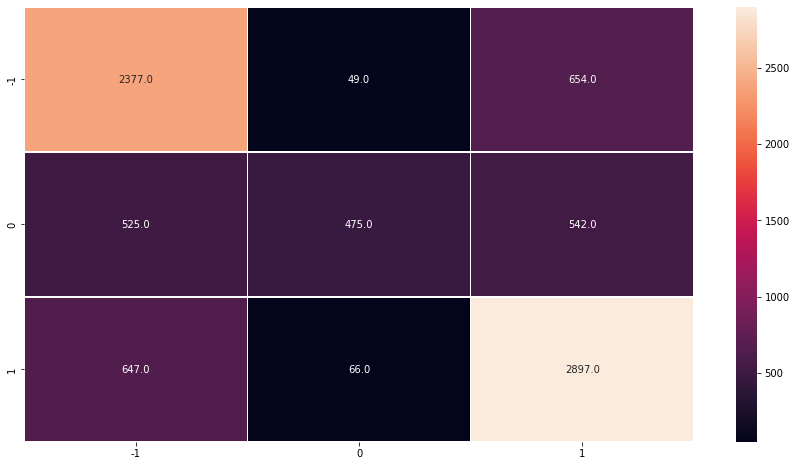

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_rf)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_rf,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_rf)

#calculate the precision
precision = precision_score(y_test,y_pred_rf, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_rf, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.6983722060252673
Precision : 0.7117900825735662
Recall : 0.6983722060252673
F1 score : 0.6816422563797638


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Random Forest Classifier'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

# **7.Support Vector Machine Classifier (SVC)**
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [ ]:
#hyperparameter tuning
svc=LinearSVC()
'''
# parameters
param =dict(penalty=['l1','l2'],
            C=[100, 10, 1.0,0.1]) 

#tunning
grid_search_svc = GridSearchCV(svc, param_grid = param)
'''
# Fit the object to train dataset
svc_tunned=svc.fit(X_train_tf_scaled,y_train)

In [ ]:
# Prediction
y_pred_svc=svc_tunned.predict(X_test_tf_scaled)

In [ ]:
# clasiification result
print('Classification result \n',classification_report(y_test,y_pred_svc))

Classification result 
               precision    recall  f1-score   support

          -1       0.79      0.78      0.78      3080
           0       0.64      0.61      0.63      1542
           1       0.80      0.82      0.81      3610

    accuracy                           0.76      8232
   macro avg       0.74      0.74      0.74      8232
weighted avg       0.76      0.76      0.76      8232



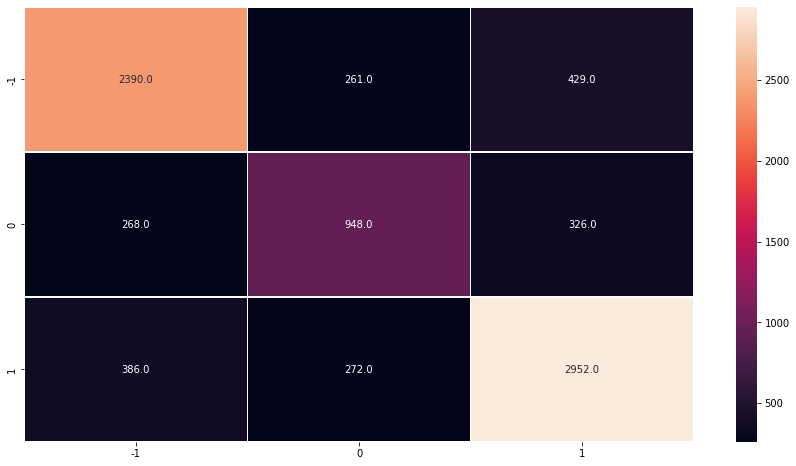

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(15,8))
conf_mx = confusion_matrix(y_test,y_pred_svc)
conf_mx
sns.heatmap(conf_mx, annot=True, linewidths=.5, fmt= '.1f',xticklabels=[-1,0,1], 
            yticklabels=[-1,0,1])

In [ ]:
# calculate the F1 score
f1score = f1_score(y_test,y_pred_svc,average='weighted')

#calculate the Accuracy
accuracy = accuracy_score(y_test,y_pred_svc)

#calculate the precision
precision = precision_score(y_test,y_pred_svc, average='weighted')

#calculate the recall
recall=recall_score(y_test,y_pred_svc, average='weighted')

print('Accuracy :' ,accuracy)
print('Precision :', precision)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7640913508260447
Precision : 0.7628848272145491
Recall : 0.7640913508260447
F1 score : 0.7633679435289713


In [ ]:
#Inserting errors in dataframe
evaluation_df.loc[i,"Model_Name"]='Support Vector Machine (SVC)'
evaluation_df.loc[i,"Accuracy"]=round(accuracy,2)
evaluation_df.loc[i,"Precision"]=round(precision,2)
evaluation_df.loc[i,"Recall"]=round(recall,2)
evaluation_df.loc[i,"F1 score"]=round(f1score,2)
i+=1

In [ ]:
evaluation_df

,Model_Name,Accuracy,Precision,Recall,F1 score
1,Logistic Regression,0.80,0.80,0.80,0.80
2,Ridge Regression,0.79,0.78,0.79,0.78
3,K-Nearest Neighbors (KNN),0.46,0.55,0.46,0.48
4,XGBoost Classifier,0.72,0.72,0.72,0.72
5,Gradient Boosting Machine (GBM),0.72,0.72,0.72,0.72
6,Random Forest Classifier,0.70,0.71,0.70,0.68
7,Support Vector Machine (SVC),0.76,0.76,0.76,0.76


(Text(0, 0.5, 'F1 score'), Text(0.5, 1.0, 'F1 score'))

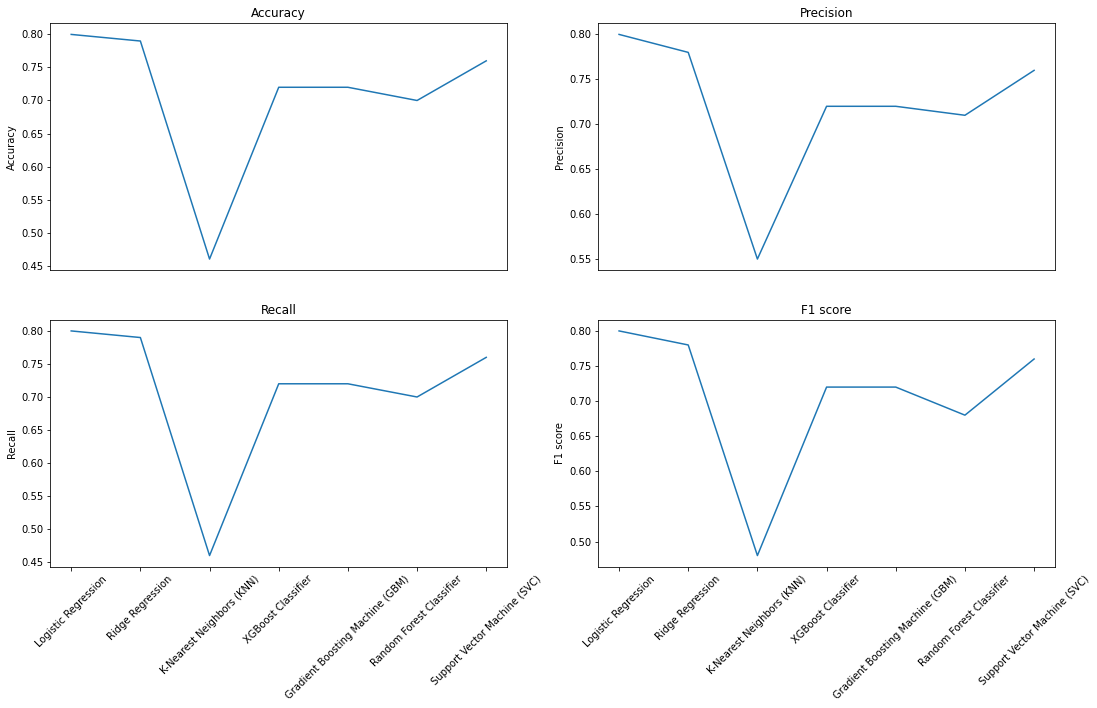

In [ ]:
# Plot the above result to compare
plt.rcParams['figure.figsize'] = (18,10) 

plt.figure()
plt.subplot(2,2,1)                                                      # here e have used subplot to plot in paralle, subplot(nrow,ncolumn,nindex)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['Accuracy'])
plt.ylabel('Accuracy') ,plt.title('Accuracy')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)                                        # to remove the notation on x axis


plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['Precision'])
plt.ylabel('Precision') , plt.title('Precision')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['Recall'])
plt.ylabel('Recall'), plt.title('Recall')

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.plot(evaluation_df['Model_Name'],evaluation_df['F1 score'])
plt.ylabel('F1 score'), plt.title('F1 score')

### **Final choice of model depends on:**

It is necessary to have a model with the highest accuracy and lowest error, as well as less complexibility and enough explainability.

# **Conclusion:**



*   K-Nearest Neighbors (KNN) doesn't work well with a large dataset having a high number of dimensions. It didn't classify the sentiments efficiently and gives worse results than all the other implemented models.

*   The Gradient Boosting classifier (GBM) and XGBoost classifier gave identical results of 0.72 F1-score.

*   The Gradient Boosting classifier (GBM), XGBoost classifier and random forrest classifier took a lot of time to run.


*   Logistic Regression gives the highest result of about 0.80 F1-score of all the implemented models ,followed by the Ridge regression and SVM giving the highest result of about 0.79 and 0.76 F1-score respectively compared to all other implemented models.
   

* While selecting a model, it should have good explainability and less complexibility. As per the result, I have three models with higher accuracy and less error. Therefore,we can select any of them.  





